# Audio Classification Notebook

# Please Note: Some of the accuracies and losses may differ from the one presented in the report due to differences with results from each compilation of code. Nevertheless, the difference should minimal



In [95]:
import librosa #python package for sound processing
import os

audio_file_path= os.path.abspath("UrbanSound8k/audio/fold1/7061-6-0-0.wav") #getting speciifc
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)





In [96]:
print(librosa_audio_data)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0231203e-05 2.3116412e-05
 0.0000000e+00]


# MetaData Info

In the following cell, we have details about each file, such as the the file name and class id

In [97]:
import os
import librosa
import pandas as pd


audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


# Extracting Features from audio files

In the following function I extract  Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [140]:

#function to extract the MFCC from a file specified by the filename parameter

def features_extractor(filename):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features



# Extracting Coeffcients

In the following cell, I loop through every audio file, and then extract the MFCC and the respective class label

In [8]:
import numpy as np
from tqdm import tqdm
import math

### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]


for index_num,row in tqdm(metadata.iterrows()): 
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    if[os.path.exists(file_name) == True]:
        data=features_extractor(file_name)
        extracted_features.append([data,final_class_labels])
        
# 8731 -4673

[]


3554it [03:16, 18.59it/s]/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8322it [07:22, 26.16it/s]/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8730it [07:42, 18.89it/s]


# Features

In the following cell we have our features, the MFCC for each audio file, and we also have the respective sound class as well of each audio file

In [99]:


extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()




,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [100]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


print(X)

[[-2.15793015e+02  7.16661224e+01 -1.31813766e+02 ... -1.68275905e+00
  -8.85858715e-01  3.54388773e-01]
 [-4.24686768e+02  1.10562271e+02 -5.41482353e+01 ...  6.17408752e-01
  -6.84973955e-01  5.71514606e-01]
 [-4.59564667e+02  1.22800354e+02 -4.79247093e+01 ...  2.22541404e+00
   1.54661775e+00 -8.36315870e-01]
 ...
 [-3.04613159e+02  1.12619904e+02 -4.71619453e+01 ... -3.03358078e+00
   2.71057296e+00  7.67189503e+00]
 [-3.44714233e+02  1.26758133e+02 -5.61771698e+01 ... -7.80225849e+00
  -1.77907360e+00  5.83541822e+00]
 [-3.15933838e+02  9.56758881e+01 -3.80477676e+01 ...  5.77580273e-01
  -1.14637651e+01 -5.96535397e+00]]


In [101]:
#the shape of the features
X.shape



(8730, 40)

In [102]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

# Label Encoding

The classes are label encoded , in order to convert the words into numbers that the model can use
each class is assigned a unique number

In [141]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


y=to_categorical(labelencoder.fit_transform(y))

In [82]:
y 



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [83]:

### Train Test Split Split data into 70 percent train and 30 percent for test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.7, test_size=0.3,random_state=0)

In [84]:
X_train

array([[-7.9193733e+01,  3.0216702e+01, -4.2485157e+01, ...,
         3.3664727e+00, -5.2109963e-01,  3.7277272e+00],
       [-2.3564542e+02,  1.4379486e+02,  1.9232050e+01, ...,
         9.2238885e-01,  8.3580236e+00, -7.4190302e+00],
       [-4.1050777e+01,  1.6512346e+02, -6.1850342e+01, ...,
        -4.7842637e-01, -1.3825036e+00, -7.3915315e-01],
       ...,
       [-5.3420612e+02,  8.7524422e+01, -1.1587095e+01, ...,
        -1.4786171e+00,  4.8392516e-01,  6.7221236e-01],
       [-1.5021329e+02,  1.3986775e+02, -3.3075691e+01, ...,
         4.7088191e-01, -1.6122357e+00, -1.3069386e+00],
       [-4.2629068e+02,  2.0952267e+02,  1.1068212e+00, ...,
        -3.6199350e+00, -1.4971467e+00, -2.8818178e-01]], dtype=float32)

In [85]:
X_test

array([[-4.23878670e+01, -2.57348156e+01, -7.00106049e+01, ...,
         1.69399726e+00, -2.71974421e+00,  3.69425201e+00],
       [-1.05353409e+02,  1.17290138e+02, -1.07948666e+01, ...,
         1.16385221e+00, -1.90002084e+00,  2.68706888e-01],
       [-1.07645889e+02,  1.36631958e+02, -2.64196911e+01, ...,
        -1.56468168e-01, -2.63752341e+00,  1.50477910e+00],
       ...,
       [-2.59349274e+02,  1.93088425e+02, -1.47181152e+02, ...,
        -1.33944845e+01,  4.54507971e+00,  3.09691262e+00],
       [-2.78440308e+02,  2.84237823e+01, -8.00081062e+00, ...,
         3.13096690e+00, -3.50013494e+00,  4.02227163e+00],
       [-4.11879517e+02,  1.60868881e+02,  2.94426308e+01, ...,
         8.22085321e-01, -8.39327514e-01,  9.43103433e-02]], dtype=float32)

# Creating our ML Model

Now we will create our model and train it using our test data.

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### No of classes
num_labels=y.shape[1]


In [87]:
#This is the NN model, 

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))


###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               4100      
                                                                 
 activation_16 (Activation)  (None, 100)               0         
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 200)               20200     
                                                                 
 activation_17 (Activation)  (None, 200)               0         
                                                                 
 dropout_17 (Dropout)        (None, 200)               0         
                                                                 
 dense_26 (Dense)            (None, 100)              

In [88]:

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#caterogical crossentropy is a loss function

#different optimzers 

In [89]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime


num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

modHist = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
175/191 [==========================>...] - ETA: 0s - loss: 10.2461 - accuracy: 0.1286
Epoch 00001: val_loss improved from inf to 2.29554, saving model to saved_models/audio_classification.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 9.6415 - accuracy: 0.1317 - val_loss: 2.2955 - val_accuracy: 0.1226
Epoch 2/500
178/191 [==========================>...] - ETA: 0s - loss: 2.5831 - accuracy: 0.1341
Epoch 00002: val_loss improved from 2.29554 to 2.28243, saving model to saved_models/audio_classification.hdf5
191/191 [==============================] - 0s 2ms/step - loss: 2.5719 - accuracy: 0.1343 - val_loss: 2.2824 - val_accuracy: 0.1180
Epoch 3/500
178/191 [==========================>...] - ETA: 0s - loss: 2.3379 - accuracy: 0.1334
Epoch 00003: val_loss improved from 2.28243 to 2.25971, saving model to saved_models/audio_classification.hdf5
191/191 [==============================] - 0s 2ms/step - loss: 2.3348 - accuracy: 0.1340 - val_loss: 2.2597 - val_acc

Epoch 26/500
167/191 [=========================>....] - ETA: 0s - loss: 1.4734 - accuracy: 0.4891
Epoch 00026: val_loss improved from 1.29253 to 1.26950, saving model to saved_models/audio_classification.hdf5
191/191 [==============================] - 0s 2ms/step - loss: 1.4724 - accuracy: 0.4901 - val_loss: 1.2695 - val_accuracy: 0.5842
Epoch 27/500
169/191 [=========================>....] - ETA: 0s - loss: 1.4437 - accuracy: 0.4970
Epoch 00027: val_loss improved from 1.26950 to 1.21033, saving model to saved_models/audio_classification.hdf5
191/191 [==============================] - 0s 2ms/step - loss: 1.4357 - accuracy: 0.4998 - val_loss: 1.2103 - val_accuracy: 0.6098
Epoch 28/500
168/191 [=========================>....] - ETA: 0s - loss: 1.4140 - accuracy: 0.5033
Epoch 00028: val_loss improved from 1.21033 to 1.19575, saving model to saved_models/audio_classification.hdf5
191/191 [==============================] - 0s 2ms/step - loss: 1.4139 - accuracy: 0.5019 - val_loss: 1.1957 - v

Epoch 52/500
159/191 [=======================>......] - ETA: 0s - loss: 1.1270 - accuracy: 0.6162
Epoch 00052: val_loss improved from 0.92442 to 0.90524, saving model to saved_models/audio_classification.hdf5
191/191 [==============================] - 0s 2ms/step - loss: 1.1418 - accuracy: 0.6122 - val_loss: 0.9052 - val_accuracy: 0.7110
Epoch 53/500
190/191 [============================>.] - ETA: 0s - loss: 1.1511 - accuracy: 0.6192
Epoch 00053: val_loss did not improve from 0.90524
191/191 [==============================] - 0s 2ms/step - loss: 1.1506 - accuracy: 0.6195 - val_loss: 0.9172 - val_accuracy: 0.7052
Epoch 54/500
178/191 [==========================>...] - ETA: 0s - loss: 1.1130 - accuracy: 0.6241
Epoch 00054: val_loss did not improve from 0.90524
191/191 [==============================] - 0s 1ms/step - loss: 1.1065 - accuracy: 0.6259 - val_loss: 0.9103 - val_accuracy: 0.7148
Epoch 55/500
179/191 [===========================>..] - ETA: 0s - loss: 1.1090 - accuracy: 0.6194
Ep

Epoch 79/500
162/191 [========================>.....] - ETA: 0s - loss: 0.9992 - accuracy: 0.6607
Epoch 00079: val_loss did not improve from 0.80805
191/191 [==============================] - 0s 2ms/step - loss: 1.0008 - accuracy: 0.6619 - val_loss: 0.8228 - val_accuracy: 0.7308
Epoch 80/500
163/191 [========================>.....] - ETA: 0s - loss: 1.0271 - accuracy: 0.6539
Epoch 00080: val_loss did not improve from 0.80805
191/191 [==============================] - 0s 2ms/step - loss: 1.0307 - accuracy: 0.6536 - val_loss: 0.8125 - val_accuracy: 0.7465
Epoch 81/500
165/191 [========================>.....] - ETA: 0s - loss: 1.0234 - accuracy: 0.6557
Epoch 00081: val_loss improved from 0.80805 to 0.80315, saving model to saved_models/audio_classification.hdf5
191/191 [==============================] - 0s 2ms/step - loss: 1.0155 - accuracy: 0.6583 - val_loss: 0.8032 - val_accuracy: 0.7480
Epoch 82/500
169/191 [=========================>....] - ETA: 0s - loss: 0.9869 - accuracy: 0.6740
Ep

181/191 [===========================>..] - ETA: 0s - loss: 0.9394 - accuracy: 0.6865
Epoch 00107: val_loss did not improve from 0.73831
191/191 [==============================] - 0s 1ms/step - loss: 0.9434 - accuracy: 0.6855 - val_loss: 0.7391 - val_accuracy: 0.7568
Epoch 108/500
182/191 [===========================>..] - ETA: 0s - loss: 0.9252 - accuracy: 0.6925
Epoch 00108: val_loss did not improve from 0.73831
191/191 [==============================] - 0s 1ms/step - loss: 0.9239 - accuracy: 0.6930 - val_loss: 0.7443 - val_accuracy: 0.7617
Epoch 109/500
185/191 [============================>.] - ETA: 0s - loss: 0.9622 - accuracy: 0.6728
Epoch 00109: val_loss did not improve from 0.73831
191/191 [==============================] - 0s 1ms/step - loss: 0.9634 - accuracy: 0.6726 - val_loss: 0.7475 - val_accuracy: 0.7675
Epoch 110/500
183/191 [===========================>..] - ETA: 0s - loss: 0.9535 - accuracy: 0.6814
Epoch 00110: val_loss did not improve from 0.73831
191/191 [============

Epoch 136/500
174/191 [==========================>...] - ETA: 0s - loss: 0.9083 - accuracy: 0.6950
Epoch 00136: val_loss did not improve from 0.70505
191/191 [==============================] - 0s 1ms/step - loss: 0.9089 - accuracy: 0.6960 - val_loss: 0.7463 - val_accuracy: 0.7659
Epoch 137/500
179/191 [===========================>..] - ETA: 0s - loss: 0.9048 - accuracy: 0.6980
Epoch 00137: val_loss did not improve from 0.70505
191/191 [==============================] - 0s 1ms/step - loss: 0.9098 - accuracy: 0.6961 - val_loss: 0.7404 - val_accuracy: 0.7682
Epoch 138/500
182/191 [===========================>..] - ETA: 0s - loss: 0.9048 - accuracy: 0.6971
Epoch 00138: val_loss did not improve from 0.70505
191/191 [==============================] - 0s 1ms/step - loss: 0.9043 - accuracy: 0.6964 - val_loss: 0.7392 - val_accuracy: 0.7721
Epoch 139/500
180/191 [===========================>..] - ETA: 0s - loss: 0.8930 - accuracy: 0.7024
Epoch 00139: val_loss did not improve from 0.70505
191/191

Epoch 165/500
179/191 [===========================>..] - ETA: 0s - loss: 0.8956 - accuracy: 0.7076
Epoch 00165: val_loss did not improve from 0.69241
191/191 [==============================] - 0s 1ms/step - loss: 0.8908 - accuracy: 0.7082 - val_loss: 0.7244 - val_accuracy: 0.7847
Epoch 166/500
179/191 [===========================>..] - ETA: 0s - loss: 0.9079 - accuracy: 0.6988
Epoch 00166: val_loss did not improve from 0.69241
191/191 [==============================] - 0s 1ms/step - loss: 0.9091 - accuracy: 0.6971 - val_loss: 0.7282 - val_accuracy: 0.7732
Epoch 167/500
178/191 [==========================>...] - ETA: 0s - loss: 0.8878 - accuracy: 0.6982
Epoch 00167: val_loss did not improve from 0.69241
191/191 [==============================] - 0s 1ms/step - loss: 0.8858 - accuracy: 0.6994 - val_loss: 0.7364 - val_accuracy: 0.7667
Epoch 168/500
173/191 [==========================>...] - ETA: 0s - loss: 0.9087 - accuracy: 0.7034
Epoch 00168: val_loss did not improve from 0.69241
191/191

Epoch 194/500
177/191 [==========================>...] - ETA: 0s - loss: 0.8720 - accuracy: 0.7112
Epoch 00194: val_loss did not improve from 0.68288
191/191 [==============================] - 0s 1ms/step - loss: 0.8721 - accuracy: 0.7095 - val_loss: 0.7047 - val_accuracy: 0.7801
Epoch 195/500
178/191 [==========================>...] - ETA: 0s - loss: 0.8698 - accuracy: 0.7165
Epoch 00195: val_loss did not improve from 0.68288
191/191 [==============================] - 0s 1ms/step - loss: 0.8717 - accuracy: 0.7149 - val_loss: 0.7175 - val_accuracy: 0.7847
Epoch 196/500
183/191 [===========================>..] - ETA: 0s - loss: 0.8804 - accuracy: 0.7092
Epoch 00196: val_loss did not improve from 0.68288
191/191 [==============================] - 0s 1ms/step - loss: 0.8773 - accuracy: 0.7118 - val_loss: 0.7178 - val_accuracy: 0.7808
Epoch 197/500
178/191 [==========================>...] - ETA: 0s - loss: 0.8439 - accuracy: 0.7173
Epoch 00197: val_loss did not improve from 0.68288
191/191

Epoch 223/500
157/191 [=======================>......] - ETA: 0s - loss: 0.8404 - accuracy: 0.7211
Epoch 00223: val_loss did not improve from 0.66367
191/191 [==============================] - 0s 2ms/step - loss: 0.8476 - accuracy: 0.7174 - val_loss: 0.7047 - val_accuracy: 0.7946
Epoch 224/500
191/191 [==============================] - ETA: 0s - loss: 0.8492 - accuracy: 0.7198
Epoch 00224: val_loss did not improve from 0.66367
191/191 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.7198 - val_loss: 0.6892 - val_accuracy: 0.7869
Epoch 225/500
187/191 [============================>.] - ETA: 0s - loss: 0.8354 - accuracy: 0.7219
Epoch 00225: val_loss did not improve from 0.66367
191/191 [==============================] - 0s 2ms/step - loss: 0.8348 - accuracy: 0.7220 - val_loss: 0.6709 - val_accuracy: 0.7946
Epoch 226/500
175/191 [==========================>...] - ETA: 0s - loss: 0.8168 - accuracy: 0.7229
Epoch 00226: val_loss did not improve from 0.66367
191/191

Epoch 252/500
179/191 [===========================>..] - ETA: 0s - loss: 0.8542 - accuracy: 0.7177
Epoch 00252: val_loss did not improve from 0.65808
191/191 [==============================] - 0s 2ms/step - loss: 0.8533 - accuracy: 0.7158 - val_loss: 0.6689 - val_accuracy: 0.7831
Epoch 253/500
178/191 [==========================>...] - ETA: 0s - loss: 0.8402 - accuracy: 0.7156
Epoch 00253: val_loss did not improve from 0.65808
191/191 [==============================] - 0s 2ms/step - loss: 0.8328 - accuracy: 0.7174 - val_loss: 0.6838 - val_accuracy: 0.7942
Epoch 254/500
191/191 [==============================] - ETA: 0s - loss: 0.8656 - accuracy: 0.7136
Epoch 00254: val_loss did not improve from 0.65808
191/191 [==============================] - 0s 2ms/step - loss: 0.8656 - accuracy: 0.7136 - val_loss: 0.6790 - val_accuracy: 0.8011
Epoch 255/500
164/191 [========================>.....] - ETA: 0s - loss: 0.8298 - accuracy: 0.7264
Epoch 00255: val_loss did not improve from 0.65808
191/191

Epoch 281/500
184/191 [===========================>..] - ETA: 0s - loss: 0.8323 - accuracy: 0.7261
Epoch 00281: val_loss did not improve from 0.64420
191/191 [==============================] - 0s 2ms/step - loss: 0.8289 - accuracy: 0.7270 - val_loss: 0.6645 - val_accuracy: 0.7965
Epoch 282/500
178/191 [==========================>...] - ETA: 0s - loss: 0.8348 - accuracy: 0.7168
Epoch 00282: val_loss did not improve from 0.64420
191/191 [==============================] - 0s 2ms/step - loss: 0.8379 - accuracy: 0.7177 - val_loss: 0.6605 - val_accuracy: 0.7976
Epoch 283/500
174/191 [==========================>...] - ETA: 0s - loss: 0.8349 - accuracy: 0.7229
Epoch 00283: val_loss did not improve from 0.64420
191/191 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.7208 - val_loss: 0.6724 - val_accuracy: 0.7946
Epoch 284/500
181/191 [===========================>..] - ETA: 0s - loss: 0.8328 - accuracy: 0.7253
Epoch 00284: val_loss did not improve from 0.64420
191/191

Epoch 310/500
185/191 [============================>.] - ETA: 0s - loss: 0.8478 - accuracy: 0.7193
Epoch 00310: val_loss did not improve from 0.64010
191/191 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.7192 - val_loss: 0.6698 - val_accuracy: 0.7911
Epoch 311/500
177/191 [==========================>...] - ETA: 0s - loss: 0.8343 - accuracy: 0.7218
Epoch 00311: val_loss did not improve from 0.64010
191/191 [==============================] - 0s 2ms/step - loss: 0.8326 - accuracy: 0.7228 - val_loss: 0.6580 - val_accuracy: 0.7957
Epoch 312/500
189/191 [============================>.] - ETA: 0s - loss: 0.8402 - accuracy: 0.7179
Epoch 00312: val_loss did not improve from 0.64010
191/191 [==============================] - 0s 2ms/step - loss: 0.8398 - accuracy: 0.7169 - val_loss: 0.6836 - val_accuracy: 0.7824
Epoch 313/500
186/191 [============================>.] - ETA: 0s - loss: 0.8297 - accuracy: 0.7203
Epoch 00313: val_loss did not improve from 0.64010
191/191

Epoch 339/500
170/191 [=========================>....] - ETA: 0s - loss: 0.8000 - accuracy: 0.7335
Epoch 00339: val_loss did not improve from 0.63898
191/191 [==============================] - 0s 2ms/step - loss: 0.8073 - accuracy: 0.7290 - val_loss: 0.6622 - val_accuracy: 0.7908
Epoch 340/500
185/191 [============================>.] - ETA: 0s - loss: 0.8062 - accuracy: 0.7297
Epoch 00340: val_loss did not improve from 0.63898
191/191 [==============================] - 0s 2ms/step - loss: 0.8083 - accuracy: 0.7298 - val_loss: 0.6636 - val_accuracy: 0.7934
Epoch 341/500
187/191 [============================>.] - ETA: 0s - loss: 0.7968 - accuracy: 0.7361
Epoch 00341: val_loss did not improve from 0.63898
191/191 [==============================] - 0s 2ms/step - loss: 0.7963 - accuracy: 0.7362 - val_loss: 0.6899 - val_accuracy: 0.7831
Epoch 342/500
184/191 [===========================>..] - ETA: 0s - loss: 0.7984 - accuracy: 0.7368
Epoch 00342: val_loss did not improve from 0.63898
191/191

Epoch 368/500
170/191 [=========================>....] - ETA: 0s - loss: 0.8445 - accuracy: 0.7230
Epoch 00368: val_loss did not improve from 0.63470
191/191 [==============================] - 0s 2ms/step - loss: 0.8448 - accuracy: 0.7238 - val_loss: 0.6484 - val_accuracy: 0.8015
Epoch 369/500
175/191 [==========================>...] - ETA: 0s - loss: 0.8027 - accuracy: 0.7334
Epoch 00369: val_loss did not improve from 0.63470
191/191 [==============================] - 0s 2ms/step - loss: 0.8033 - accuracy: 0.7336 - val_loss: 0.6730 - val_accuracy: 0.7973
Epoch 370/500
170/191 [=========================>....] - ETA: 0s - loss: 0.7847 - accuracy: 0.7432
Epoch 00370: val_loss did not improve from 0.63470
191/191 [==============================] - 0s 2ms/step - loss: 0.7933 - accuracy: 0.7408 - val_loss: 0.6581 - val_accuracy: 0.7862
Epoch 371/500
177/191 [==========================>...] - ETA: 0s - loss: 0.8220 - accuracy: 0.7308
Epoch 00371: val_loss did not improve from 0.63470
191/191

Epoch 397/500
172/191 [==========================>...] - ETA: 0s - loss: 0.7779 - accuracy: 0.7349
Epoch 00397: val_loss did not improve from 0.62526
191/191 [==============================] - 0s 2ms/step - loss: 0.7814 - accuracy: 0.7346 - val_loss: 0.6599 - val_accuracy: 0.7961
Epoch 398/500
173/191 [==========================>...] - ETA: 0s - loss: 0.8187 - accuracy: 0.7328
Epoch 00398: val_loss did not improve from 0.62526
191/191 [==============================] - 0s 2ms/step - loss: 0.8164 - accuracy: 0.7336 - val_loss: 0.6575 - val_accuracy: 0.7835
Epoch 399/500
165/191 [========================>.....] - ETA: 0s - loss: 0.7919 - accuracy: 0.7364
Epoch 00399: val_loss did not improve from 0.62526
191/191 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.7339 - val_loss: 0.6405 - val_accuracy: 0.7961
Epoch 400/500
165/191 [========================>.....] - ETA: 0s - loss: 0.7932 - accuracy: 0.7375
Epoch 00400: val_loss did not improve from 0.62526
191/191

157/191 [=======================>......] - ETA: 0s - loss: 0.7991 - accuracy: 0.7448
Epoch 00426: val_loss did not improve from 0.62526
191/191 [==============================] - 0s 2ms/step - loss: 0.7979 - accuracy: 0.7447 - val_loss: 0.6670 - val_accuracy: 0.7927
Epoch 427/500
172/191 [==========================>...] - ETA: 0s - loss: 0.7712 - accuracy: 0.7489
Epoch 00427: val_loss did not improve from 0.62526
191/191 [==============================] - 0s 2ms/step - loss: 0.7711 - accuracy: 0.7475 - val_loss: 0.6535 - val_accuracy: 0.7919
Epoch 428/500
176/191 [==========================>...] - ETA: 0s - loss: 0.8005 - accuracy: 0.7370
Epoch 00428: val_loss did not improve from 0.62526
191/191 [==============================] - 0s 2ms/step - loss: 0.8005 - accuracy: 0.7357 - val_loss: 0.6455 - val_accuracy: 0.7976
Epoch 429/500
175/191 [==========================>...] - ETA: 0s - loss: 0.7826 - accuracy: 0.7427
Epoch 00429: val_loss did not improve from 0.62526
191/191 [============

Epoch 455/500
172/191 [==========================>...] - ETA: 0s - loss: 0.7820 - accuracy: 0.7442
Epoch 00455: val_loss did not improve from 0.62329
191/191 [==============================] - 0s 3ms/step - loss: 0.7756 - accuracy: 0.7446 - val_loss: 0.6430 - val_accuracy: 0.7984
Epoch 456/500
184/191 [===========================>..] - ETA: 0s - loss: 0.7920 - accuracy: 0.7412
Epoch 00456: val_loss did not improve from 0.62329
191/191 [==============================] - 0s 2ms/step - loss: 0.7898 - accuracy: 0.7410 - val_loss: 0.6426 - val_accuracy: 0.8022
Epoch 457/500
185/191 [============================>.] - ETA: 0s - loss: 0.7936 - accuracy: 0.7400
Epoch 00457: val_loss did not improve from 0.62329
191/191 [==============================] - 0s 2ms/step - loss: 0.7953 - accuracy: 0.7413 - val_loss: 0.6460 - val_accuracy: 0.7995
Epoch 458/500
182/191 [===========================>..] - ETA: 0s - loss: 0.7847 - accuracy: 0.7416
Epoch 00458: val_loss did not improve from 0.62329
191/191

Epoch 484/500
179/191 [===========================>..] - ETA: 0s - loss: 0.8028 - accuracy: 0.7371
Epoch 00484: val_loss did not improve from 0.62257
191/191 [==============================] - 0s 2ms/step - loss: 0.7981 - accuracy: 0.7393 - val_loss: 0.6319 - val_accuracy: 0.8053
Epoch 485/500
180/191 [===========================>..] - ETA: 0s - loss: 0.7555 - accuracy: 0.7503
Epoch 00485: val_loss did not improve from 0.62257
191/191 [==============================] - 0s 2ms/step - loss: 0.7601 - accuracy: 0.7505 - val_loss: 0.6321 - val_accuracy: 0.8053
Epoch 486/500
191/191 [==============================] - ETA: 0s - loss: 0.7806 - accuracy: 0.7392
Epoch 00486: val_loss improved from 0.62257 to 0.61940, saving model to saved_models/audio_classification.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 0.7806 - accuracy: 0.7392 - val_loss: 0.6194 - val_accuracy: 0.8011
Epoch 487/500
180/191 [===========================>..] - ETA: 0s - loss: 0.7824 - accuracy: 0.740

# Acurracies and Losses

In the following cell I calculate the losses and accuracies using the training and test data

In [91]:


test_accuracy=model.evaluate(X_test,y_test,verbose=0)

print("Test accuracy of the model is {}".format(test_accuracy[1]))
print("Validation accuracy is 0.7418 as per the model")

print()

print("Test or validation loss of the model is {}".format(test_accuracy[0]))
print("Training loss is 0.78322 as per the model")

Test accuracy of the model is 0.8018327355384827
Validation accuracy is 0.7418 as per the model

Test or validation loss of the model is 0.6346983909606934
Training loss is 0.78322 as per the model


# Graphs of Loss and Accuracies

In the following 4 cells, I plot the validation and training losses and validation and trianing accuracies. I have 4 graphs, to show how different iterations of the code looks like

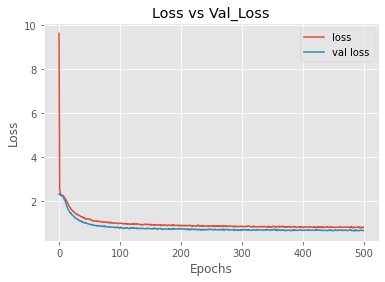

In [109]:
#will change to 500, actually will plot the chart as well, to see how it changes, 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(modHist.history['loss'], label = 'loss')
plt.plot(modHist.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



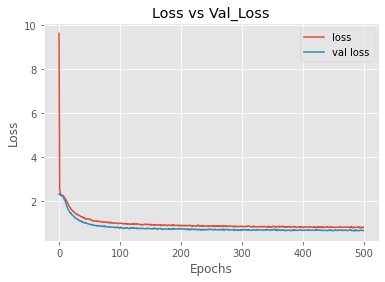

In [110]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(modHist.history['loss'], label = 'loss')
plt.plot(modHist.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



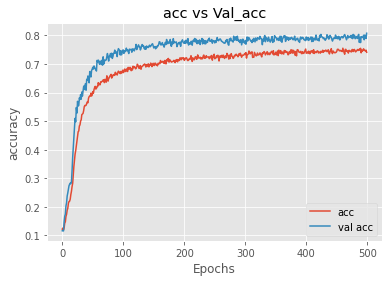

In [90]:
#this is the accuracy graph for the one I got a first
plt.style.use('ggplot')
plt.plot(modHist.history['accuracy'], label = 'acc')
plt.plot(modHist.history['val_accuracy'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


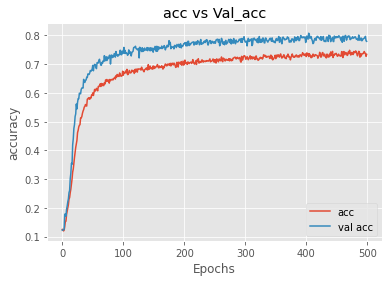

In [63]:
plt.style.use('ggplot')
plt.plot(modHist.history['accuracy'], label = 'acc')
plt.plot(modHist.history['val_accuracy'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# Visualizing Predictions THrough a Confusion Matrix

In the following cell I attempted to create a confusion matrix and heatmap in order to visually see what classes are accurately predicted and which are not, but I got the following error. I tried to fix it but could now

In [70]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

print('n', 'Test_Accuracy:-', test_accuracy[1])

pred = model.predict(X_test)
print(pred)

y_pred = np.argmax(y_pred,axis-1)
y_test=np.argmax(y_test, axis=1)

print('confusion matrix')
print(confusion_matrix(pred, y_test,labels=[]'dog_bark')
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


n Test_Accuracy:- 0.8033600449562073
[[0.0000000e+00 9.3684763e-30 3.0710825e-34 ... 1.8543998e-23
  5.6309008e-34 3.3219959e-29]
 [1.2704876e-01 2.4307916e-02 4.1269042e-02 ... 2.3709269e-01
  1.5907915e-02 2.1024971e-01]
 [8.6785913e-01 6.2400842e-04 4.1492512e-03 ... 5.6349277e-04
  7.6077767e-03 2.2624737e-02]
 ...
 [5.6291527e-15 9.9709392e-01 1.3187917e-05 ... 1.2627344e-13
  6.4969918e-09 2.7278899e-03]
 [2.3295324e-06 7.6745506e-05 1.9257281e-07 ... 9.9202299e-01
  7.0488665e-07 2.4499366e-05]
 [2.3735999e-13 8.5453766e-10 2.7674931e-09 ... 5.5040515e-19
  5.9600427e-07 1.1496947e-05]]


AxisError: axis 1 is out of bounds for array of dimension 1

# Getting Images for the CNN

In the following cell, the function mel_spectrogram creates a spectorgram image for the specificed file passed in.

In the code above it, I make 10 folders, for the 10 different classes that each image will belong to. I have to do this for the Image generator step

In [111]:
import librosa.display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
#import skimage.io 

audio_file_path= os.path.abspath("UrbanSound8k/audio/fold1/7061-6-0-0.wav") #getting speciifc
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
n_mels = 128

#function to generate mel spectrogram image for each audio file
#dog_barking, children playing,


if(os.path.isdir('MelImages/dog_bark') == False):
    os.mkdir('MelImages/dog_bark')
    
if(os.path.isdir('MelImages/air_conditioner') == False):
    os.mkdir('MelImages/air_conditioner')

if(os.path.isdir('MelImages/car_horn') == False):
    os.mkdir('MelImages/car_horn')

if(os.path.isdir('MelImages/children_playing') == False):
    os.mkdir('MelImages/children_playing')

if(os.path.isdir('MelImages/drilling') == False):
    os.mkdir('MelImages/drilling')

if(os.path.isdir('MelImages/engine_idling') == False):
    os.mkdir('MelImages/engine_idling')

if(os.path.isdir('MelImages/gun_shot') == False):
    os.mkdir('MelImages/gun_shot')

if(os.path.isdir('MelImages/jackhammer') == False):
    os.mkdir('MelImages/jackhammer')
    
if(os.path.isdir('MelImages/siren') == False):
    os.mkdir('MelImages/siren')
    
if(os.path.isdir('MelImages/street_music') == False):
    os.mkdir('MelImages/street_music')



def mel_spectrogram(filename,file_class):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    sgram = librosa.stft(audio)
    sgram_mag,_ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    #mely = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels)
    spec_image = librosa.display.specshow(mel_sgram,sr=sample_rate)
    plt.savefig("MelImages/{}/{}.png".format(file_class,filename))
    




In the following cell the spectrogram is drawn for each audio file, and based on the files class, it is placed in the appropriate folder

In [2]:

mel_features = []

part = len(metadata) - 8500
count = 0
for index_num,row in tqdm(metadata.iterrows()):
    if(count <= part):
        file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
        mel_spectrogram(str(row["slice_file_name"]),str(row["class"])) #also pass in the file type as well, will 
        count += 1
    else:
        break
    
    

NameError: name 'metadata' is not defined

# Image Preperation and Network

In the following cell, the ImageDataGenerator rescales the spectrogram image and splites the images into 80 percent train, and 20 percent test


In [130]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


img_dir = os.path.abspath('MelImages/')
#print(img_dir)

datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    img_dir,
    target_size=(150,150),
    shuffle=True,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    img_dir,
    target_size=(150,150),
    subset='validation'
)


#Convenl
CNNmodel = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax') 
]) 



Found 188 images belonging to 11 classes.
Found 43 images belonging to 11 classes.


In [132]:
CNNmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


CNNmodel.fit(train_generator,batch_size=32,epochs=40)

Epoch 1/40
6/6 [==============================] - 2s 219ms/step - loss: 1.5430 - accuracy: 0.5266
Epoch 2/40
6/6 [==============================] - 1s 217ms/step - loss: 1.1476 - accuracy: 0.6170
Epoch 3/40
6/6 [==============================] - 2s 232ms/step - loss: 0.9280 - accuracy: 0.7074
Epoch 4/40
6/6 [==============================] - 1s 218ms/step - loss: 0.6796 - accuracy: 0.7819
Epoch 5/40
6/6 [==============================] - 1s 217ms/step - loss: 0.5273 - accuracy: 0.8138
Epoch 6/40
6/6 [==============================] - 2s 225ms/step - loss: 0.4598 - accuracy: 0.8670
Epoch 7/40
6/6 [==============================] - 2s 286ms/step - loss: 0.3583 - accuracy: 0.8989
Epoch 8/40
6/6 [==============================] - 2s 253ms/step - loss: 0.2311 - accuracy: 0.9521
Epoch 9/40
6/6 [==============================] - 2s 234ms/step - loss: 0.2390 - accuracy: 0.9362
Epoch 10/40
6/6 [==============================] - 2s 245ms/step - loss: 0.1731 - accuracy: 0.9521
Epoch 11/40
6/6 [==

# Training Accuracy and Loss

In following 2 cells,the graph of the training loss and accuracy is shown

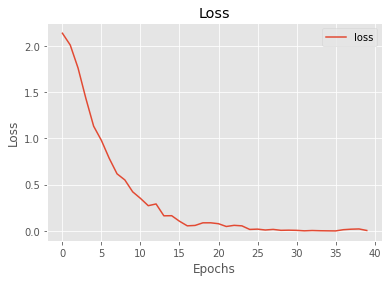

In [103]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(CNNModel.history['loss'], label = 'loss')
#plt.plot(CNNModel.history['validation_loss'], label='val loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

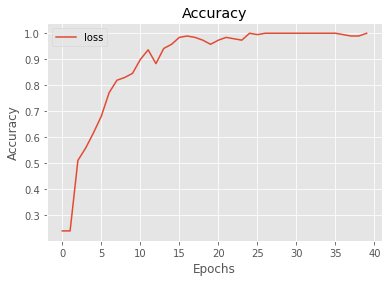

In [134]:
# the accuracy
 #then confusion plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(CNNModel.history['accuracy'], label = 'loss')
#plt.plot(CNNModel.history['validation_loss'], label='val loss')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
    

# Test Accuracy and Loss

The following cell describes the test accuracy and loss

In [133]:
CCN_accuracy = CNNmodel.evaluate(validation_generator)

print('n', 'Test_Accuracy:-', CCN_accuracy[1])


print("Test loss: {}".format(CCN_accuracy[0]))

2/2 [==============================] - 1s 52ms/step - loss: 0.0373 - accuracy: 0.9767
n Test_Accuracy:- 0.9767441749572754
Test loss: 0.03725641965866089


# Confusion Matrix and Heatmap

The heatmap of the confusion matrix is shown in the output of the second cell

2/2 [==============================] - 1s 50ms/step - loss: 0.0373 - accuracy: 0.9767
n Test_Accuracy:- 0.9767441749572754
confusion matrix
[[11  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  1]]


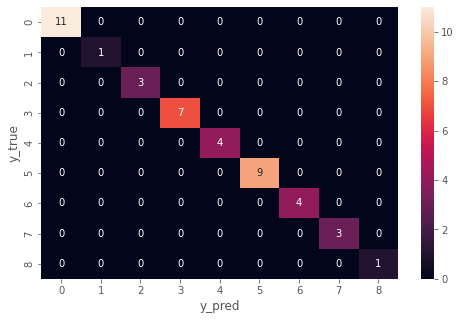

In [145]:

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns

accuracy = CNNmodel.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = CNNmodel.predict(validation_generator)

y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Extra Classifiers

In the following 2 cells, I also experimented with 2 classifers we discussed in class. We can see that the  test accuracies are not very good for these classifiers. Audio classification is not inteded for classifiers such as these

In [144]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt





clf = DecisionTreeClassifier(random_state=0)


clf.fit(X_train,y_train)

print("Score of Decision Tree Classifier is {}".format(clf.score(X_test,y_test)))

#will also use a random forest


Score of Decision Tree Classifier is 0.6933944253531883
Score of Decision Tree Classifier is 1.0


In [143]:
from sklearn.ensemble import RandomForestClassifier


randomForestClf = RandomForestClassifier(n_estimators = 300)

randomForestClf.fit(X_train,y_train)

print("Score of Ranom Forest Classifier is {}".format(randomForestClf.score(X_test,y_test)))



Score of Ranom Forest Classifier is 0.6361206567392135
